In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
model = LogisticRegression(solver = 'liblinear')
train_df = pd.read_csv('Weatherpreprocessed/train_input.csv')
train_target = pd.read_csv('Weatherpreprocessed/train_target.csv')

In [3]:
numerical_col = train_df.select_dtypes(include = np.number).columns.tolist()
categorical_col = train_df.select_dtypes('object').columns.tolist()

In [4]:
encoder = OneHotEncoder()
encoder.fit(train_df[categorical_col])

OneHotEncoder()

In [5]:

encoded_col = list(encoder.get_feature_names_out(categorical_col))

In [6]:
%%time
model.fit(train_df[numerical_col + encoded_col],train_target)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 1.58 s
Wall time: 1.68 s


LogisticRegression(solver='liblinear')

In [7]:
print(numerical_col + encoded_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [8]:
print(model.coef_.tolist())

[[0.8944896612116684, -2.7907145054865383, 3.173461985961068, 1.0239046011039747, -1.6625393959605776, 6.781248651170675, -0.9375070133225254, -1.4396838039061557, 0.3419501133766737, 6.005983172652769, 5.499104511045013, -9.200681215984334, -0.16157814300007356, 1.271573753108938, 0.49795924060587876, 1.8995976045667406, 0.26288259438962774, -0.30226291422063134, 0.25892697983639534, -0.01484719919587572, 0.1732780402264108, -0.15560591040820396, 0.1170095480739824, 0.2014246736756174, -0.027734658214713895, 0.005491303933040334, 0.14552448427541423, -0.021177754258429438, -0.07362329645898609, -0.2628499394720061, -0.0699020661556389, -0.324673719132938, -0.37264049389763615, -0.12774702892382145, -0.1890624238367395, -0.30527373953377723, 0.02210772444848833, -0.011510997110881688, 0.012026382521901434, -0.4588069863915369, -0.202882922416566, 0.0018286618077805474, -0.23291452794281492, -0.2547425597402613, -0.054389037095094225, 0.07062710636460832, 0.22348073527389406, 0.28428862

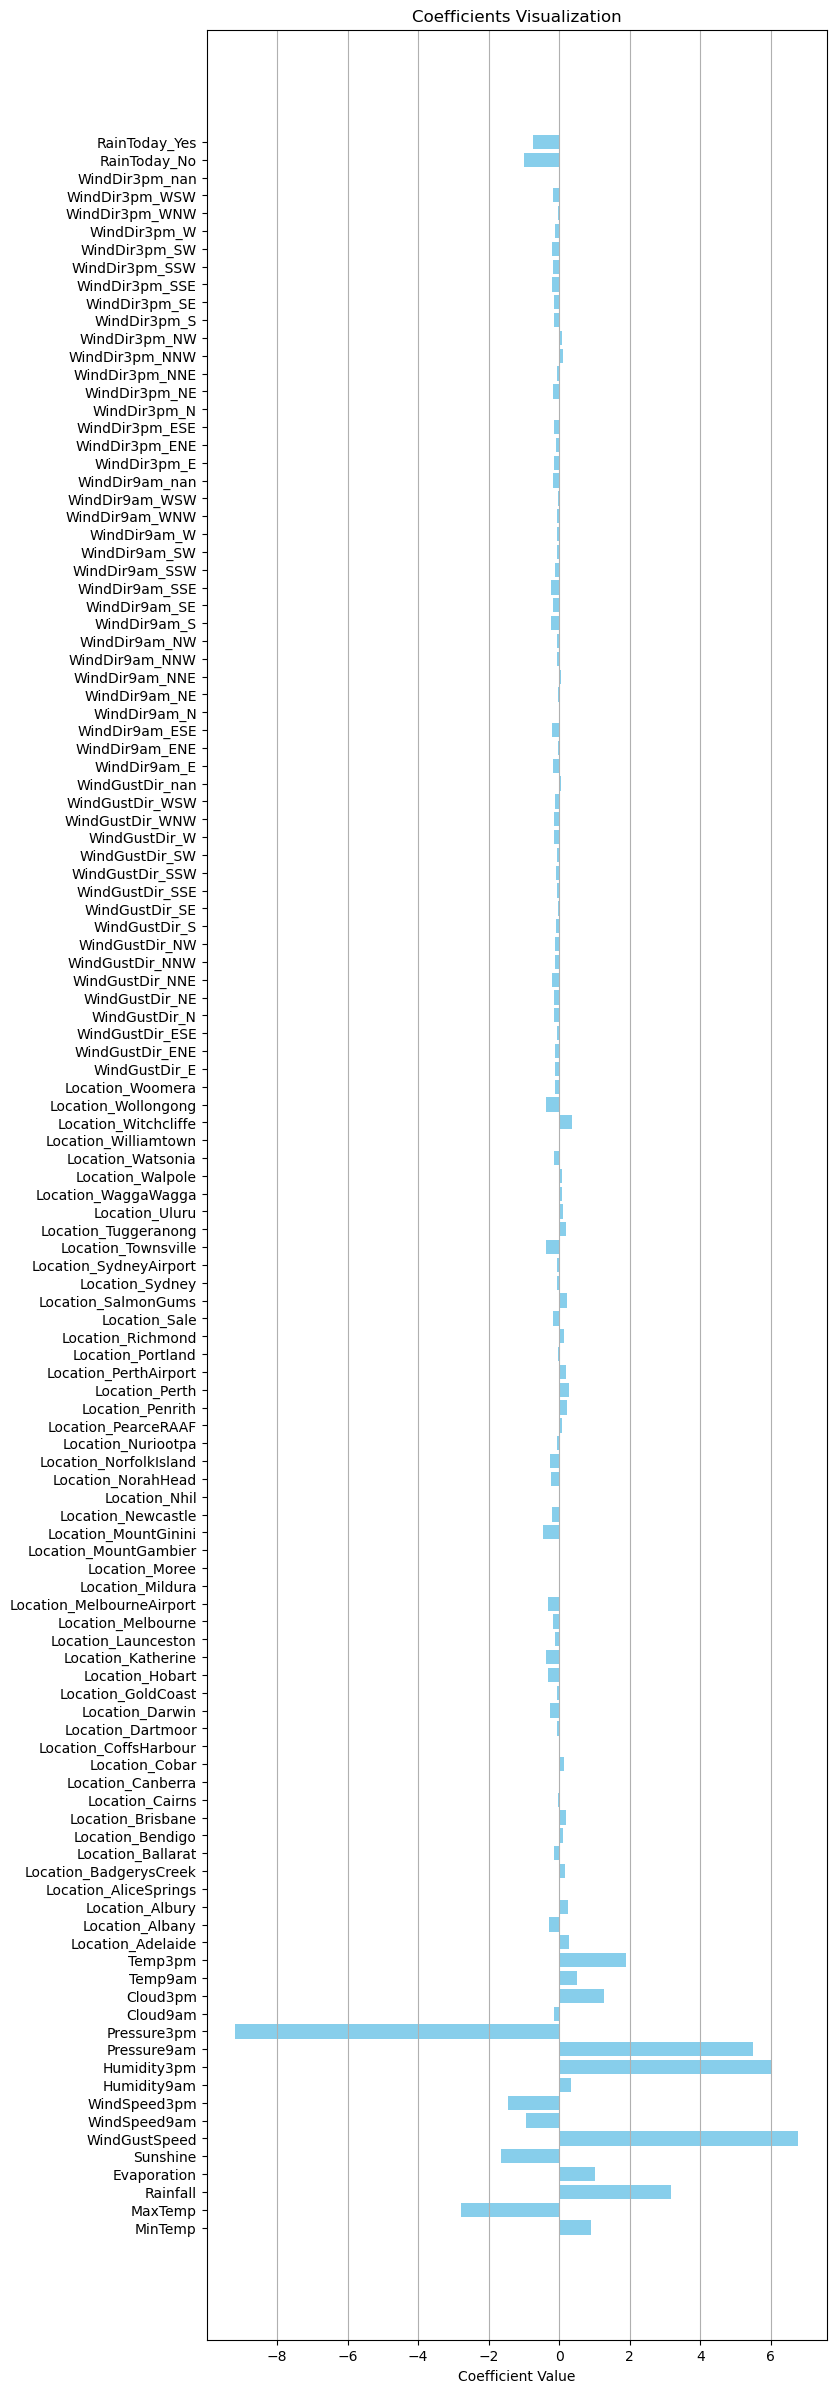

In [9]:
import matplotlib.pyplot as plt
feature_names = numerical_col + encoded_col
plt.figure(figsize=(8, 30))
plt.barh(feature_names, model.coef_.ravel(), color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients Visualization')
plt.grid(axis='x')
plt.show()

In [10]:
print(model.intercept_)

[-1.73652828]


<Axes: xlabel='weight', ylabel='feature'>

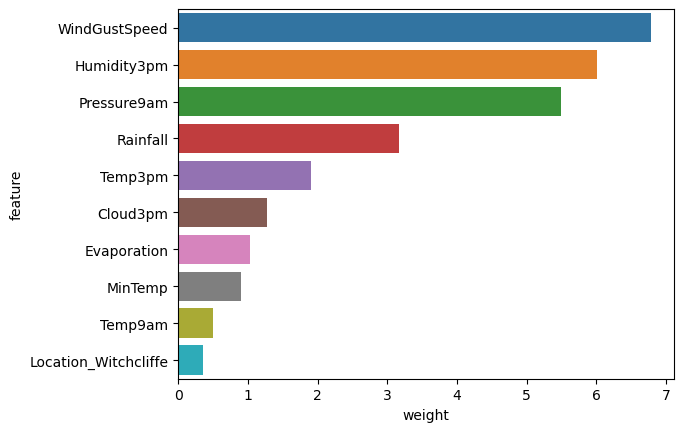

In [11]:
weight_df = pd.DataFrame({
    'feature' : (numerical_col + encoded_col),
    'weight'  : model.coef_.tolist()[0]
})
import seaborn as sns
sns.barplot(data = weight_df.sort_values('weight', ascending = False).head(10), x = 'weight', y = 'feature' )

In [12]:
valid_df = pd.read_csv('Weatherpreprocessed/validation_input.csv')
test_df = pd.read_csv('Weatherpreprocessed/test_input.csv')     

In [13]:
X_train = train_df[numerical_col + encoded_col]
X_test = test_df[numerical_col + encoded_col]
X_valid = valid_df[numerical_col + encoded_col]

In [14]:
train_predict = model.predict(X_train)

In [15]:
train_predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [16]:
valid_target = pd.read_csv('Weatherpreprocessed/validation_target.csv')
test_target = pd.read_csv('Weatherpreprocessed/test_target.csv')     

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target.values,train_predict)

0.8518083847001674

In [25]:
train_probs = model.predict_proba(X_train)

In [26]:
train_probs

array([[0.94153617, 0.05846383],
       [0.93924488, 0.06075512],
       [0.96225866, 0.03774134],
       ...,
       [0.98745204, 0.01254796],
       [0.98331649, 0.01668351],
       [0.87372458, 0.12627542]])

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target.values, train_predict, normalize = 'true')

array([[0.94601654, 0.05398346],
       [0.477475  , 0.522525  ]])

Accuracy: 85.18%


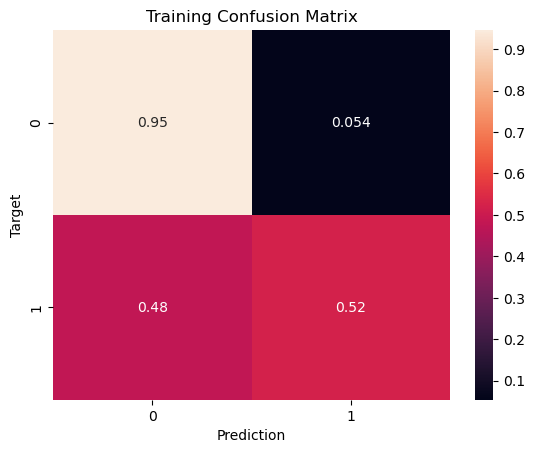

In [29]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds
train_preds = predict_and_plot(X_train, train_target.values, 'Training')

Accuracy: 85.35%


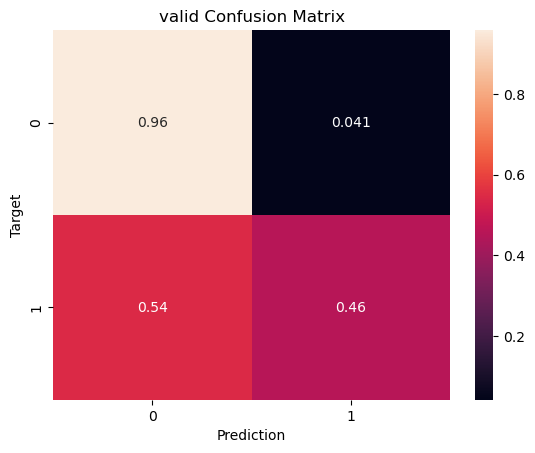

In [30]:
val_preds = predict_and_plot(X_valid, valid_target.values, 'valid')

Accuracy: 84.14%


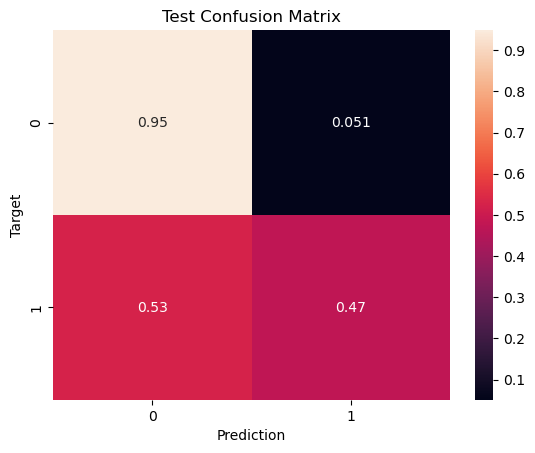

In [32]:
test_preds = predict_and_plot(X_test, test_target.values, 'Test')